In [1]:
import sklearn

In [2]:
print ("Hello Saharsh")

Hello Saharsh


## Dragon Real Estate price  predictor

In [3]:
import pandas as pd

In [4]:
housing = pd.read_csv("housing.csv")

In [5]:
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [7]:
housing['LSTAT']

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
484    9.67
485    9.08
486    5.64
487    6.48
488    7.88
Name: LSTAT, Length: 489, dtype: float64

In [8]:
housing['LSTAT'].value_counts()

8.05     3
7.79     3
6.36     3
14.10    3
18.13    3
        ..
15.12    1
15.79    1
12.12    1
13.28    1
7.88     1
Name: LSTAT, Length: 442, dtype: int64

In [9]:
housing.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'MEDV'}>]], dtype=object)

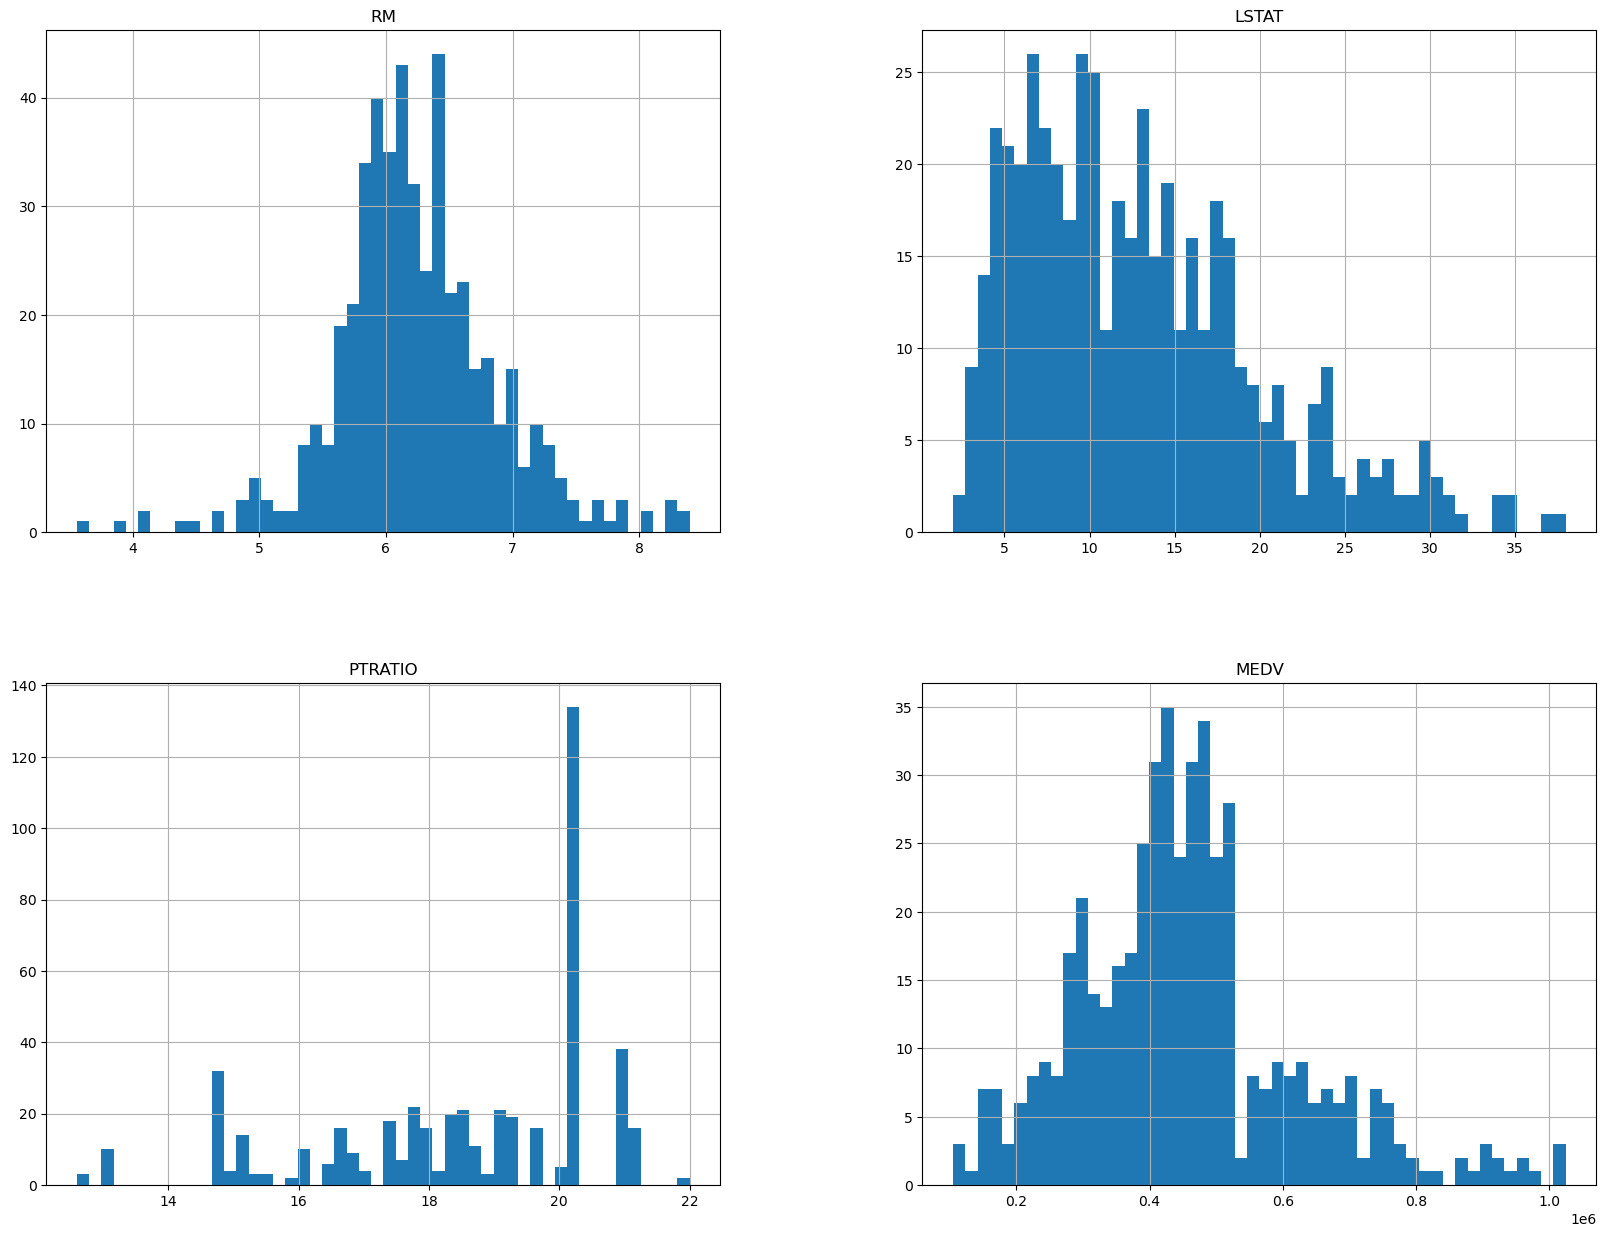

In [12]:
housing.hist(bins=50, figsize=(20,15))

## train test splitting

In [13]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(housing, 0.2)

[451  84 434 472 428 312  30 220 482 231   9 124 422 204 360  70 430 431
 364 211  78 181 424  55  76  77 154 265 271 381 101 126 314 322  33  73
   0  11 229 193 403 393 407 153  68 195  18 442 483 480 427  39 173 304
 155  72 461  93 329 148 484 426  63 311 338 272  90 262 397 478 420 104
 335 468 474  79 298 316  82 131 310 290 390 479 117 340  86  75 429  15
 209 378  19 317 376  56 275 398 325 140 433 416 487  25 459 137 454 349
  42 208 237 274 249 467 355 410 245 440  22 321  46  31 113 370 299 192
 132  57 182  24  17 180  66 261 176  94 318 384  23 210 346 307   5 116
  45  16 452 400   3 341 446  60 110 457 301  29 175 225  26   7 444 108
  37 157 456 118 114 227 172 144 362 473 185 203 418 436 141 358  67 199
 168 368 402 234 109 476 145 455 152 253 218  83 296 165 248 228  74 399
 266 238 119 277 294 441 347 351 244 222 375 406  36 196 139 357 412 280
 281  59 111 287 409   6 353 423 332 158 150 177 386 184 278  10 373 103
  81  38 408 167 475 291 367 198 354 250 247 194  8

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['RM']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [17]:
strat_test_set['RM'].value.counts()

NameError: name 'strat_test_set' is not defined

In [27]:
strat_train_set['RM'].value_counts()

NameError: name 'strat_train_set' is not defined

In [25]:
95/7

13.571428571428571

In [26]:
376/28

13.428571428571429

##  CORRELATIONS FUNCTIONS 

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix['RM'].sort_values(ascending=False)

RM         1.000000
MEDV       0.697209
PTRATIO   -0.304559
LSTAT     -0.612033
Name: RM, dtype: float64

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.697209
PTRATIO   -0.519034
LSTAT     -0.760670
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

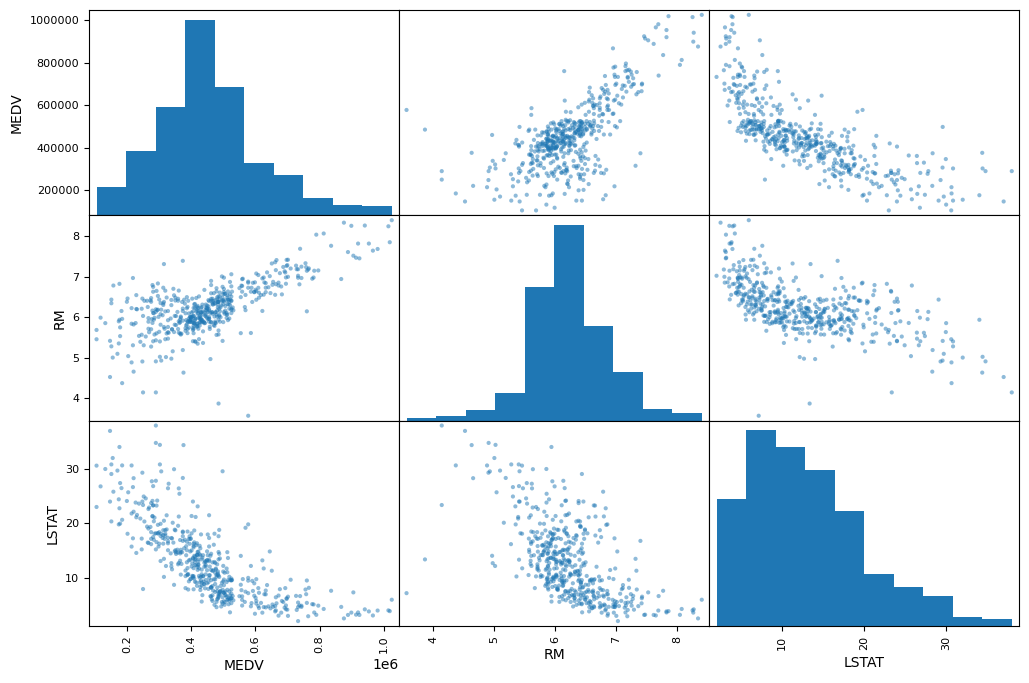

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

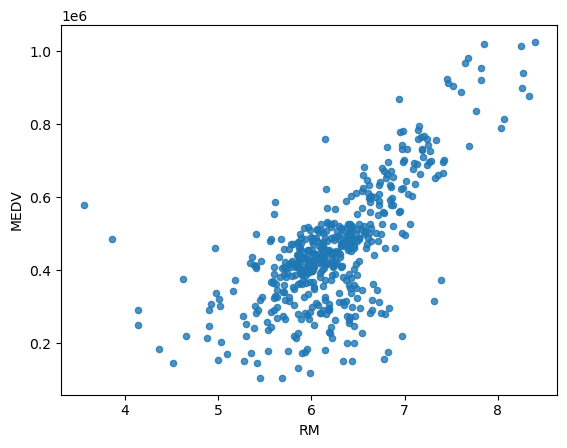

In [22]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Attribute Combination (saharsh)

In [23]:
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [24]:
 corr_matrix = housing.corr()
 corr_matrix['MEDV'].sort_values(ascending=False)   

MEDV       1.000000
RM         0.697209
PTRATIO   -0.519034
LSTAT     -0.760670
Name: MEDV, dtype: float64

In [29]:
a = housing.dropna(subset=["RM"]) 
a.shape

(489, 4)

In [30]:
 housing.drop("RM", axis=1).shape #option2

(489, 3)

In [32]:
median = housing["RM"].median()

In [33]:
median

6.185

In [34]:
housing["RM"].fillna(median)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
484    6.593
485    6.120
486    6.976
487    6.794
488    6.030
Name: RM, Length: 489, dtype: float64

In [35]:
housing.shape

(489, 4)

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([6.185e+00, 1.169e+01, 1.910e+01, 4.389e+05])

In [41]:
imputer.statistics_.shape

(4,)

In [42]:
X = imputer.transform(housing)

In [44]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [45]:
housing_tr.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Scikit-learn Design

## Creation of pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),])                      

In [50]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [51]:
housing_num_tr

array([[ 0.52055395, -1.1250769 , -1.5250831 ,  0.30064004],
       [ 0.28104837, -0.53706982, -0.33974768, -0.00449803],
       [ 1.46924486, -1.25935736, -0.33974768,  1.66104726],
       ...,
       [ 1.14420158, -1.03178731,  1.17748167,  0.28792595],
       [ 0.86114953, -0.91305511,  1.17748167,  0.04635831],
       [-0.32704695, -0.71516812,  1.17748167, -1.23776439]])

## Selecting a desired model for dragon real Estates

In [52]:
housing_num_tr.shape

(489, 4)

##Evaluating the model

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

NameError: name 'housing_labels' is not defined

## Using better evaluation technique - Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_squared_error" ,cv=10)
rmse_scores = np.sqrt(-scores)

NameError: name 'housing_labels' is not defined

In [72]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [84]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## SAVING THE MODEL AND TESTING

In [91]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

NameError: name 'strat_test_set' is not defined

In [93]:
from joblib import dump, load
model = load('Dragon.joblib')